# Ewaluacja modelu LigthGBM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

## 1. Wczytanie danych i modelu

In [3]:
test_df = pd.read_csv("../../data/processed/test.csv")
X_test = test_df.drop("Yield_tons_per_hectare", axis=1)
y_test = test_df["Yield_tons_per_hectare"]

model = joblib.load("../../outputs/models/lightgbm_model_n_100.pkl")
y_pred = model.predict(X_test)

## 2. Wypisanie metryk

In [4]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 0.40
RMSE: 0.50
R2: 0.91


## 3. Utworzenie wykresów

### 3.1. Wykres rzeczywiste vs przewidywane wyniki

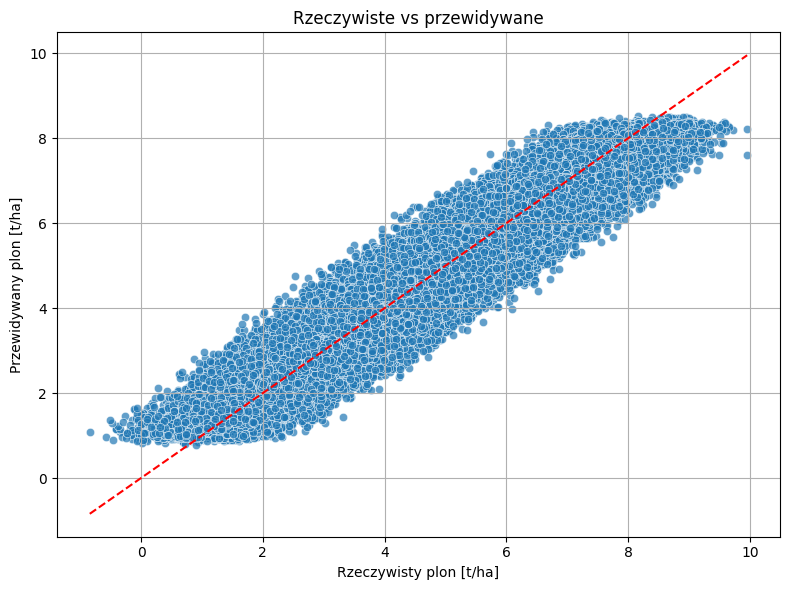

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Rzeczywisty plon [t/ha]")
plt.ylabel("Przewidywany plon [t/ha]")
plt.title("Rzeczywiste vs przewidywane")
plt.grid(True)
plt.tight_layout()
plt.savefig("../../outputs/figures/LightGBM/lightgbm_actual_vs_predicted.png")
plt.show()

### 3.2. Wykres rozkładu błędu

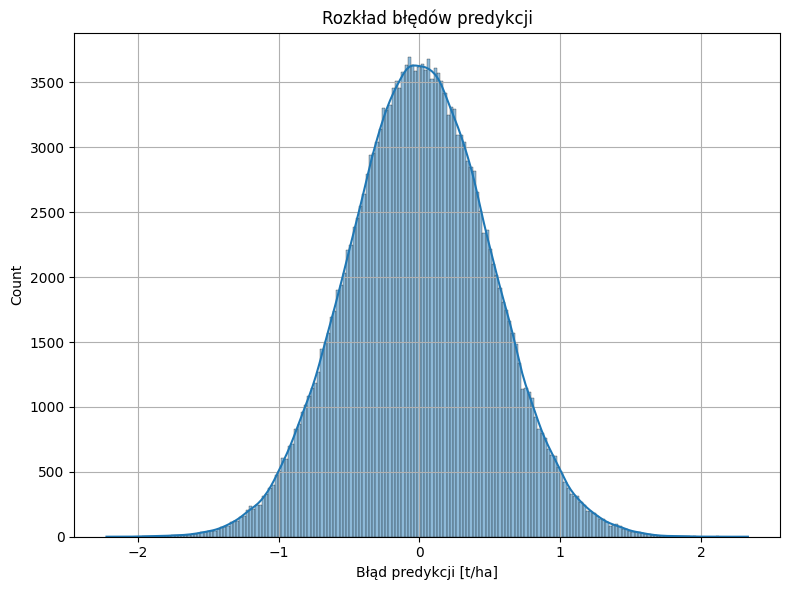

In [6]:
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.xlabel("Błąd predykcji [t/ha]")
plt.title("Rozkład błędów predykcji")
plt.grid(True)
plt.tight_layout()
plt.savefig("../../outputs/figures/LightGBM/lightgbm_error_distribution.png")
plt.show()

### 3.3. Wykres najważniejszych cech

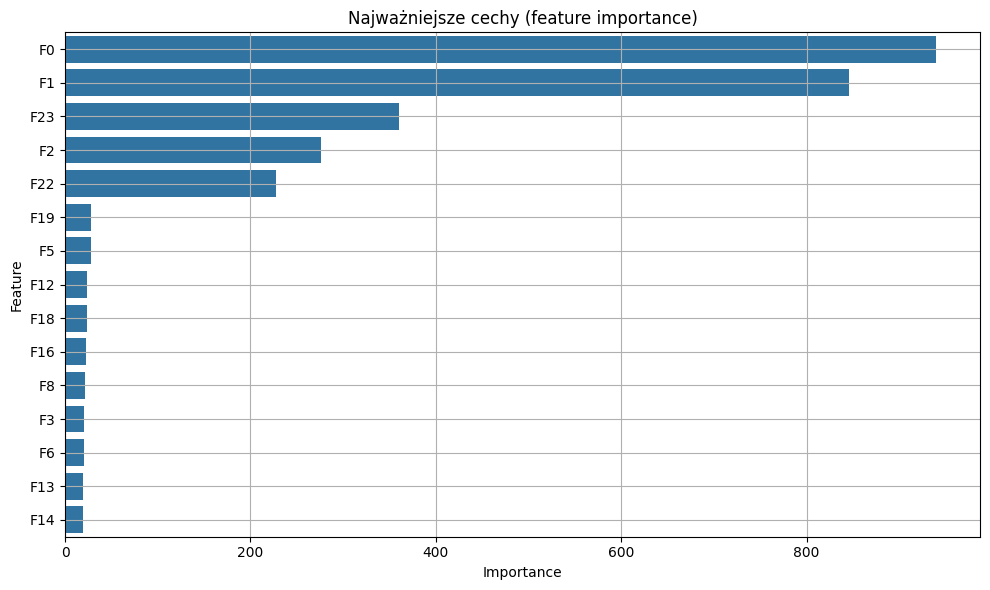

In [7]:
importance = model.feature_importances_
feature_names = [f"F{i}" for i in range(X_test.shape[1])]
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x="Importance", y="Feature")
plt.title("Najważniejsze cechy (feature importance)")
plt.grid(True)
plt.tight_layout()
plt.savefig("../../outputs/figures/LightGBM/lightgbm_feature_importance.png")
plt.show()